In [1]:
pip install --upgrade mizani

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
data=pd.read_csv(r'C:\Users\ASUS\4_Data_Science\Data_Mahasiswa.csv', sep=';')

In [7]:
data.head()

,Email Address,Nama Lengkap Mahasiswa,NIM,Program Studi Mahasiswa,Angkatan Mahasiswa,Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?,Apakah Anda biasanya menggunakan media sosial melalui laptop?,Berapa lama waktu yang Anda habiskan menggunakan media sosial melalui Laptop setiap hari?,Media sosial apa yang Anda aktifkan saat menggunakan laptop? (Centang semua yang sesuai),Jenis konten apa yang paling sering Anda tonton atau akses di media sosial Instagram melalui laptop? (Hubungkan dengan media sosial yang dipilih),...,Apakah Anda pernah mengikuti olimpiade atau kompetisi akademik?,Tingkat manakah Anda mengikuti olimpiade?,Berapa jumlah saudara yang Anda miliki?,Apa Pekerjaan Ayah Anda?,Apa Pendidikan Terakhir Ayah Anda?,Berapa Range Penghasilan Ayah Anda?,Apa Pekerjaan Ibu Anda?,Apa Pendidikan Terakhir Ibu Anda?,Berapa Rentang Penghasilan Ibu Anda?,Programming Skill
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
1,NaN,Samuel Saut Royzeki Aritonang,11422026,Sarjana Terapan Teknologi Rekayasa Perangkat L...,2022,9 - 11 jam,Ya,3 - 5 jam,"Instagram, Tiktok","Hiburan (Video lucu, meme, dll.), Edukasi (Tut...",...,Tidak,NaN,05-Jun,telah meninggal dunia,SMP/sederajat,"Rp. 500,000 - Rp. 999,999",Pegawai negeri sipil,Diploma III,"Rp. 2,000,000 - Rp. 4,999,999",70
2,NaN,Calvin Josep Silaen,11422038,Sarjana Terapan Teknologi Rekayasa Perangkat L...,2022,6 - 8 jam,Tidak,NaN,NaN,NaN,...,Tidak,NaN,03-Apr,Petani/pekebun,Diploma IV atau Strata I,"Rp. 2,000,000 - Rp. 4,999,999",Perdagangan,Diploma IV atau Strata I,"Rp. 2,000,000 - Rp. 4,999,999",42
3,NaN,Indah Silitonga,11422060,Sarjana Terapan Teknologi Rekayasa Perangkat L...,2022,6 - 8 jam,Ya,0 - 2 jam,Instagram,"Hiburan (Video lucu, meme, dll.)",...,Tidak,NaN,03-Apr,Petani/pekebun,SMA/sederajat,"Rp. 1,000,000 - Rp. 1,999,999",Pegawai negeri sipil,Diploma IV atau Strata I,"Rp. 2,000,000 - Rp. 4,999,999",36
4,NaN,Asri Yohana Sirait,11422029,Sarjana Terapan Teknologi Rekayasa Perangkat L...,2022,3 - 5 jam,Tidak,NaN,NaN,NaN,...,Ya,"Tingkat Lokal (Kabupaten/Kota), Tingkat Region...",03-Apr,Petani/pekebun,SMA/sederajat,"Rp. 2,000,000 - Rp. 4,999,999",Petani/pekebun,SMA/sederajat,"Rp. 2,000,000 - Rp. 4,999,999",56


In [8]:
print(data.columns)

Index(['Email Address', 'Nama Lengkap Mahasiswa', 'NIM ',
       'Program Studi Mahasiswa', 'Angkatan Mahasiswa',
       'Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?  ',
       'Apakah Anda biasanya menggunakan media sosial melalui laptop?  ',
       'Berapa lama waktu yang Anda habiskan menggunakan media sosial melalui Laptop setiap hari?  ',
       'Media sosial apa yang Anda aktifkan saat menggunakan laptop? (Centang semua yang sesuai)',
       'Jenis konten apa yang paling sering Anda tonton atau akses di media sosial Instagram melalui laptop? (Hubungkan dengan media sosial yang dipilih)  ',
       'Jenis konten apa yang paling sering Anda tonton atau akses di media sosial TikTok melalui laptop? (Hubungkan dengan media sosial yang dipilih)  ',
       'Jenis konten apa yang paling sering Anda tonton atau akses di media sosial Youtube melalui laptop? (Hubungkan dengan media sosial yang dipilih)  ',
       'Berapa lama waktu yang Anda habiskan menggunakan pons

In [9]:
print("Dataframe:")
print(data)

Dataframe:
                      Email Address         Nama Lengkap Mahasiswa      NIM   \
0                               NaN                            NaN       NaN   
1                               NaN  Samuel Saut Royzeki Aritonang  11422026   
2                               NaN            Calvin Josep Silaen  11422038   
3                               NaN                Indah Silitonga  11422060   
4                               NaN             Asri Yohana Sirait  11422029   
..                              ...                            ...       ...   
502     angelnapitupulu85@gmail.com               Angel Stephanie   11421026   
503        freskytobing69@gmail.com        Fresky Brilliant Tobing  11421025   
504  sopranitapanjaitan22@gmail.com            Sopranita Panjaitan  11421012   
505       ssimangunsong61@gmail.com   Samuel Emeraldo Simangunsong  11421006   
506    pustahasimanjuntak@gmail.com   Nicholas Pustaha Simanjuntak  11421035   

                            

In [11]:
df_clean = data[['Angkatan Mahasiswa', 'Programming Skill']].dropna()
df_clean['Programming Skill'] = pd.to_numeric(df_clean['Programming Skill'], errors='coerce')
df_clean = df_clean.dropna()
df_clean['Angkatan Mahasiswa'] = df_clean['Angkatan Mahasiswa'].astype(str)

In [13]:

from plotnine import ggplot, aes, geom_col, geom_point, geom_path, scale_color_discrete

# Mengelompokkan data berdasarkan angkatan mahasiswa
df_grouped = df_clean.groupby('Angkatan Mahasiswa', as_index=False).mean()
df_grouped = df_grouped.sort_values(by='Angkatan Mahasiswa')

df_grouped['yfit'] = df_grouped['Programming Skill'] + np.tile([-2, 2], len(df_grouped) // 2)

df_grouped['cat'] = df_grouped['Angkatan Mahasiswa']

# Membuat visualisasi
plot = (
    ggplot(df_grouped)
    + geom_col(aes(x='Angkatan Mahasiswa', y='Programming Skill', fill='cat'))
    + geom_point(aes(x='Angkatan Mahasiswa', y='yfit', color='cat'))
    + geom_path(aes(x='Angkatan Mahasiswa', y='yfit', color='cat'))
    + scale_color_discrete(l=0.4)
)

print(plot)


<ggplot: (640 x 480)>


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


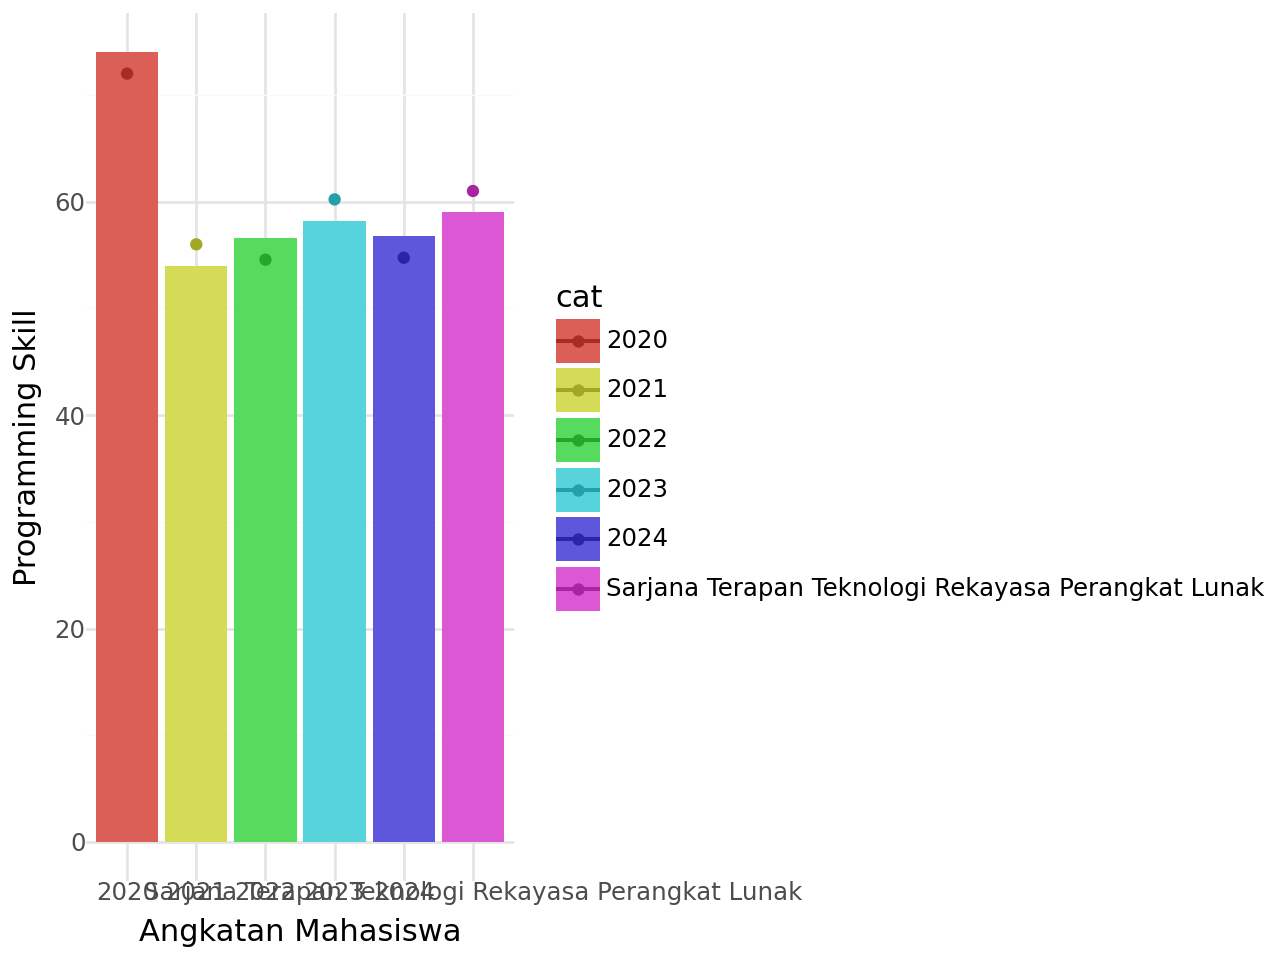

In [14]:
from plotnine import ggplot, aes, geom_col, geom_point, geom_path, scale_color_discrete, theme_minimal

plot += theme_minimal()  # Opsional untuk tema lebih rapi
plot


In [16]:
from plotnine import ggplot, aes, geom_col, geom_line, scale_color_hue, ggtitle


In [40]:
df_clean = data[['Berapa rata-rata nilai Fisika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)', 'Programming Skill', 'Angkatan Mahasiswa']].dropna()
df_clean['Berapa rata-rata nilai Fisika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)'] = pd.to_numeric(df_clean['Berapa rata-rata nilai Fisika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)'], errors='coerce')
df_clean['Programming Skill'] = pd.to_numeric(df_clean['Programming Skill'], errors='coerce')
df_clean = df_clean.dropna()
df_clean['Angkatan Mahasiswa'] = df_clean['Angkatan Mahasiswa'].astype(str)

In [41]:
df_grouped = df_clean.groupby('Angkatan Mahasiswa', as_index=False).mean()
df_grouped = df_grouped.sort_values(by='Programming Skill')

df_grouped['yfit'] = df_grouped['Angkatan Mahasiswa'].astype(float) + np.tile([-2, 2], len(df_grouped) // 2)
df_grouped['cat'] = df_grouped['Angkatan Mahasiswa']


In [42]:
plot = (
    ggplot(df_grouped)
    + geom_col(aes(x='Programming Skill', y='Angkatan Mahasiswa', fill='cat'))
    + geom_point(aes(x='Programming Skill', y='yfit', color='cat'))
    + geom_path(aes(x='Programming Skill', y='yfit', color='cat'))
    + scale_color_discrete(l=0.4)
)

In [36]:
df_grouped['yfit'] = df_grouped['Programming Skill'] + np.random.uniform(-2, 2, size=len(df_grouped))

In [44]:
print(df_clean.head())

Empty DataFrame
Columns: [Berapa rata-rata nilai Fisika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D), Programming Skill, Angkatan Mahasiswa]
Index: []


In [45]:
df_grouped['yfit'] = df_grouped['Angkatan Mahasiswa'].astype(str)


In [59]:
print(df_clean.head())
print(df_clean.dtypes)


   Programming Skill Angkatan Mahasiswa
1                 70               2022
2                 42               2022
3                 36               2022
4                 56               2022
5                 76               2023
Programming Skill      int64
Angkatan Mahasiswa    object
dtype: object


In [60]:
df_clean['Angkatan Mahasiswa'] = df_clean['Angkatan Mahasiswa'].astype("category")